<center><h1> LIVER PATIENT RECORDS</h1></center>

### Description

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

### Acknowledgements

This dataset was downloaded from the UCI ML Repository:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Problem Statement

Training model to determine which patients are likely to have liver disease and which ones not. 

### Data Description

Any patient whose age exceeded 89 is listed as being of age "90" to reduce outliers.

Columns:

* Age of the patient

* Gender of the patient

* Total Bilirubin
>Bilirubin is an orange-yellow pigment that occurs normally when part of your red blood cells break down.
A bilirubin test measures the amount of bilirubin in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease.
 
* Direct Bilirubin
>Bilirubin attached by the liver to glucuronic acid, a glucose-derived acid, is called direct, or conjugated, bilirubin. Bilirubin not attached to glucuronic acid is called indirect

* Alkaline Phosphotase
>Alkaline phosphatase (ALP) is an enzyme in a person's blood that helps break down proteins.Using an ALP test, it is possible to measure how much of this enzyme is circulating in a person’s blood.

* Alamine Aminotransferase
> Alanine aminotransferase (ALT) is an enzyme found primarily in the liver and kidney.   ALT is increased with liver damage and is used to screen for and/or monitor liver disease. 

* Aspartate Aminotransferase
> AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. When your liver is damaged, it releases AST into your bloodstream. An AST blood test measures the amount of AST in your blood. The test can help your health care provider diagnose liver damage or disease.

* Total Protiens
> Albumin and globulin are two types of protein in your body. The total protein test measures the total amount albumin and globulin in your body. 

* Albumin

* Albumin and Globulin Ratio
    
**Dataset: field used to split the data into two sets (patient with liver disease, or no disease)**

### Business objectives and constraints

1. The cost of a mis-classification can be very high.
2. There is no strict latency concerns.

### Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
liver_df = pd.read_csv("liver.csv")

In [3]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver_df.shape

(583, 11)

### Exploratory Data Analysis (EDA)

In [5]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
liver_df.isnull().sum().sum()

4

Total No. Of Living Cases :-  416
Total No. Of Died Cases :-  167


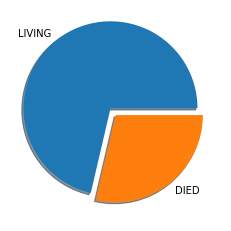

In [9]:
live,dead=liver_df['Dataset'].value_counts()
arr=np.array([live,dead])
print("Total No. Of Living Cases :- ",live)
print("Total No. Of Died Cases :- ",dead)
plt.pie(arr,labels=['LIVING', 'DIED'], explode = [0.1,0.0] ,shadow=True)
plt.show()

Number of patients that are male:  441
Number of patients that are female:  142


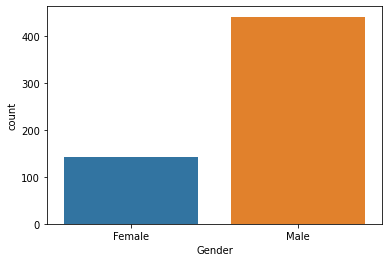

In [10]:
# Plotting the Number of Male and Female patients
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

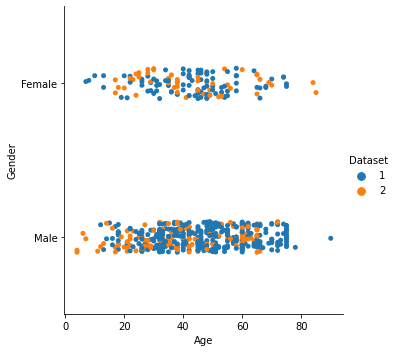

In [11]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df)

In [12]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


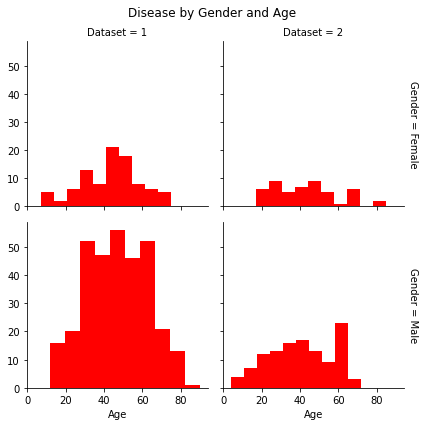

In [13]:
# Plotting Age vs Gender
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')
plt.show()

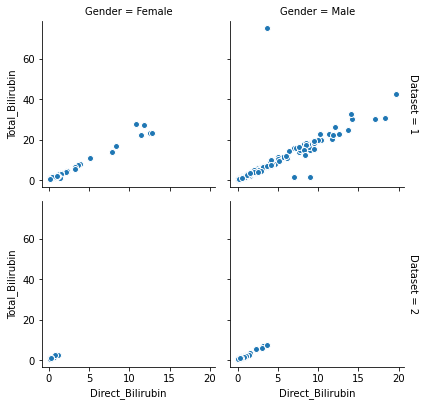

In [14]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

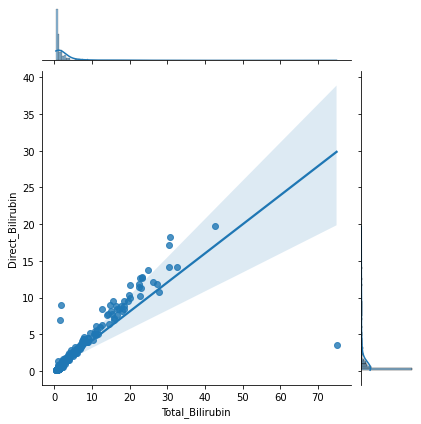

In [15]:
# Plotting Total_Bilirubin vs Direct_Bilirubin
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")
plt.show()

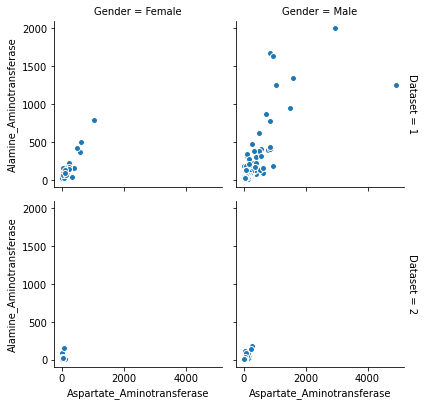

In [16]:
# Plotting Gender(Male/Female) along with Aspartate Aminotransferase, Alamine Aminotransferase
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

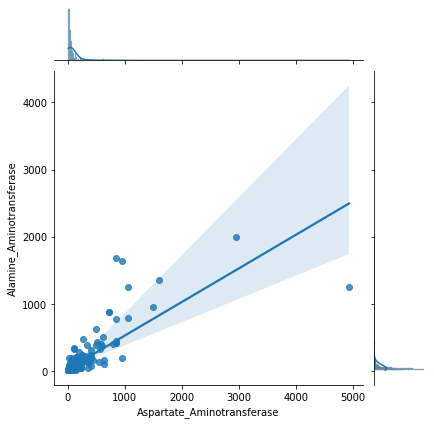

In [17]:
# Plotting Aspartate_Aminotransferase vs Alamine_Aminotransferase
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")
plt.show()

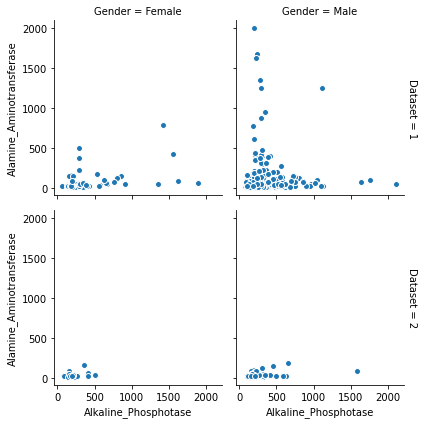

In [18]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Alamine_Aminotransferase
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.show()

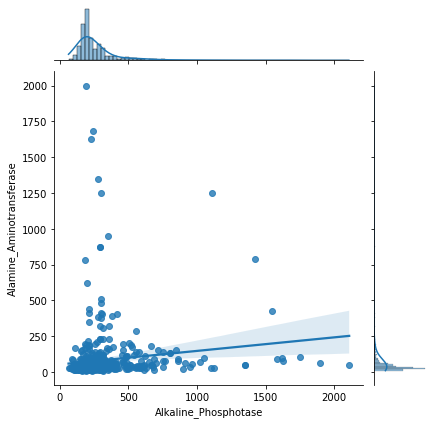

In [19]:
# Plotting Alkaline_Phosphotase vs Alamine_Aminotransferase
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")
plt.show()

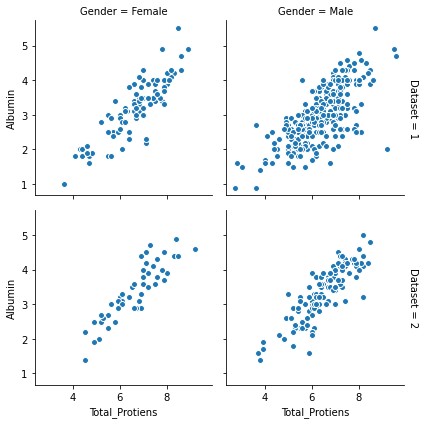

In [20]:
# Plotting Gender(Male/Female) along with Total_Protiens and Albumin
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.show()

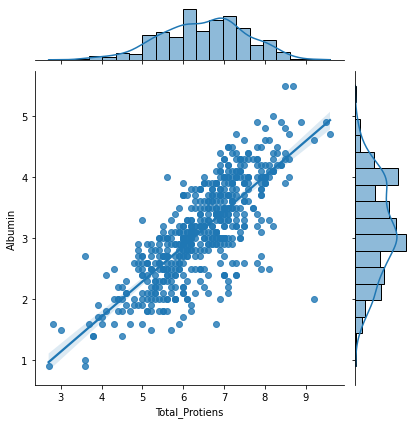

In [21]:
# Plotting Total_Protiens vs Albumin
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")
plt.show()

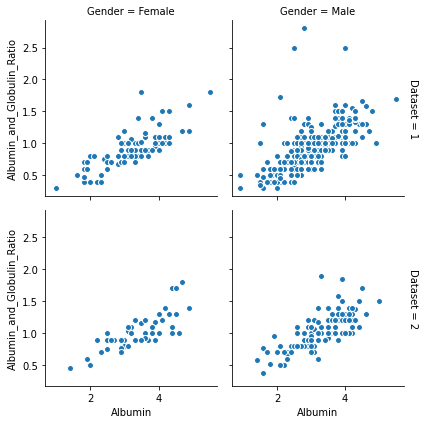

In [22]:
# Plotting Gender(Male/Female) along with Albumin and Albumin_and_Globulin_Ratio
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.show()

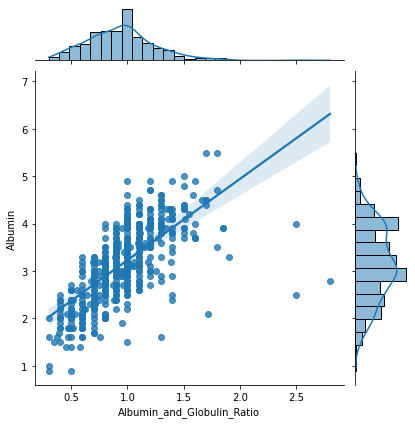

In [23]:
# Plotting Albumin vs Albumin_and_Globulin_Ratio
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")
plt.show()

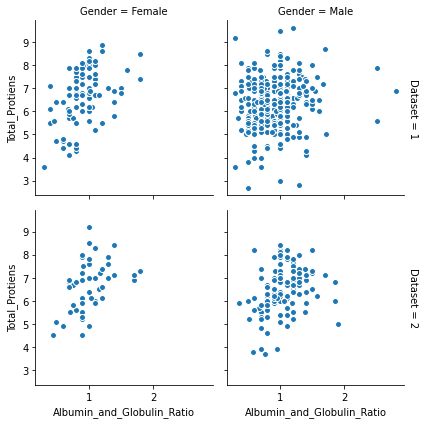

In [24]:
# Plotting Gender(Male/Female) along with Albumin and Globulin Ratio and Total Protiens
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.show()

### Feature Engineering

In [25]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [26]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
# Concatination
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [28]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [29]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [30]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [31]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [86]:
X = liver_df.drop(['Age','Gender','Dataset','Aspartate_Aminotransferase','Gender_Female','Gender_Male'], axis=1)
X.head(3)

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.7,0.1,187,16,6.8,3.3,0.90
1,10.9,5.5,699,64,7.5,3.2,0.74
2,7.3,4.1,490,60,7.0,3.3,0.89


In [87]:
# In the Dataset 1 implies the patient have liver disease; 2 implies the patients do not have liver disease
y = liver_df['Dataset']

### Correlation between all the features

In [88]:
liver_corr = X.corr()
liver_corr

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Total_Bilirubin,1.000000,0.874618,0.206669,0.214065,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.874618,1.000000,0.234939,0.233894,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.206669,0.234939,1.000000,0.125680,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,0.214065,0.233894,0.125680,1.000000,-0.042518,-0.029742,-0.002374
Total_Protiens,-0.008099,-0.000139,-0.028514,-0.042518,1.000000,0.784053,0.233904
Albumin,-0.222250,-0.228531,-0.165453,-0.029742,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.206159,-0.200004,-0.233960,-0.002374,0.233904,0.686322,1.000000


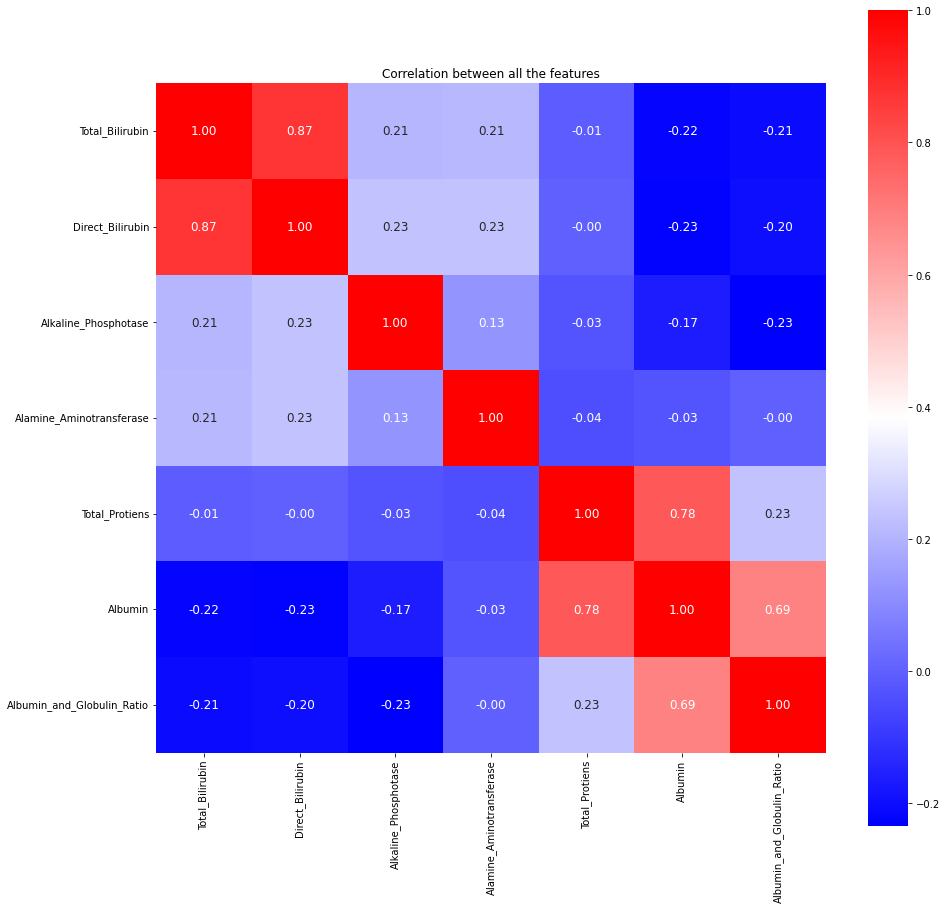

In [89]:
# Plotting Heatmaps for Correlations between all the features
plt.figure(figsize=(15,15))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12}, cmap= 'bwr')
plt.title('Correlation between all the features')
plt.show()

### Splitting the datasets

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(390, 7)
(390,)
(193, 7)
(193,)


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(A,y_test, y_pred):
    print(A," Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print(A," Precision Score:- ", precision_score(y_test, y_pred)) 
    print(A," Recall Score:- ", recall_score(y_test, y_pred)) 
    print(A," Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))
    print(A,'Classification Report: \n', classification_report(y_test,y_pred))

### Model Selection

### 1. Logistic Regression

In [92]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_predLR=LR.predict(X_test)
evaluating_model("Logistic Regrestion",y_test,y_predLR)
LR_TRAIN_SCORE = round(LR.score(X_train, y_train) * 100, 2)
LR_TEST_SCORE = round(LR.score(X_test, y_test) * 100, 2)
print(LR_TRAIN_SCORE)
print(LR_TEST_SCORE)

Logistic Regrestion  Accuracy Score:-  0.7202072538860104
Logistic Regrestion  Precision Score:-  0.7485714285714286
Logistic Regrestion  Recall Score:-  0.9290780141843972
Logistic Regrestion  Confusion Matrix:- 
 [[131  10]
 [ 44   8]]
Logistic Regrestion Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.93      0.83       141
           2       0.44      0.15      0.23        52

    accuracy                           0.72       193
   macro avg       0.60      0.54      0.53       193
weighted avg       0.67      0.72      0.67       193

72.05
72.02


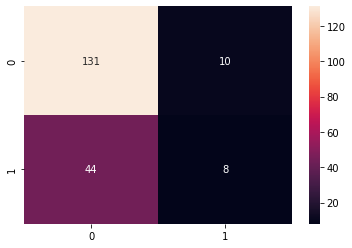

In [93]:
sns.heatmap(confusion_matrix(y_test,y_predLR),annot=True,fmt='d')
plt.show()

### 2. Gaussian Naive Bayes

In [94]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)
y_predGNB=GNB.predict(X_test)
evaluating_model("Gaussian Naive Bayes",y_test,y_predGNB)
GNB_TRAIN_SCORE = round(GNB.score(X_train, y_train) * 100, 2)
GNB_TEST_SCORE = round(GNB.score(X_test, y_test) * 100, 2)
print(GNB_TRAIN_SCORE)
print(GNB_TEST_SCORE)

Gaussian Naive Bayes  Accuracy Score:-  0.5751295336787565
Gaussian Naive Bayes  Precision Score:-  0.9836065573770492
Gaussian Naive Bayes  Recall Score:-  0.425531914893617
Gaussian Naive Bayes  Confusion Matrix:- 
 [[60 81]
 [ 1 51]]
Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.43      0.59       141
           2       0.39      0.98      0.55        52

    accuracy                           0.58       193
   macro avg       0.68      0.70      0.57       193
weighted avg       0.82      0.58      0.58       193

53.08
57.51


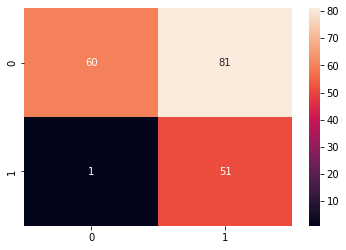

In [95]:
sns.heatmap(confusion_matrix(y_test,y_predGNB),annot=True,fmt='d')
plt.show()

### 3. Random Forest

In [96]:
RFC=RandomForestClassifier(n_estimators=100)
RFC.fit(X_train,y_train)
y_predRFC=RFC.predict(X_test)
evaluating_model("Random Forest",y_test,y_predRFC)
RFC_TRAIN_SCORE = round(RFC.score(X_train, y_train) * 100, 2)
RFC_TEST_SCORE = round(RFC.score(X_test, y_test) * 100, 2)
print(RFC_TRAIN_SCORE)
print(RFC_TEST_SCORE)

Random Forest  Accuracy Score:-  0.7150259067357513
Random Forest  Precision Score:-  0.76875
Random Forest  Recall Score:-  0.8723404255319149
Random Forest  Confusion Matrix:- 
 [[123  18]
 [ 37  15]]
Random Forest Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.87      0.82       141
           2       0.45      0.29      0.35        52

    accuracy                           0.72       193
   macro avg       0.61      0.58      0.59       193
weighted avg       0.68      0.72      0.69       193

100.0
71.5


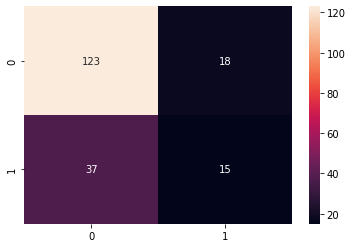

In [97]:
sns.heatmap(confusion_matrix(y_test,y_predRFC),annot=True,fmt='d')
plt.show()

## 4.Support Vector Machine

In [1]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [99]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [100]:
svc=SVC(C=0.1, gamma=1)
svc.fit(X_train,y_train)
y_predSVC=svc.predict(X_test)
evaluating_model("Support VVector Machine",y_test,y_predSVC)
SVC_TRAIN_SCORE = round(svc.score(X_train, y_train) * 100, 2)
SVC_TEST_SCORE = round(svc.score(X_test, y_test) * 100, 2)
print(SVC_TRAIN_SCORE)
print(SVC_TEST_SCORE)

Support VVector Machine  Accuracy Score:-  0.7305699481865285
Support VVector Machine  Precision Score:-  0.7305699481865285
Support VVector Machine  Recall Score:-  1.0
Support VVector Machine  Confusion Matrix:- 
 [[141   0]
 [ 52   0]]
Support VVector Machine Classification Report: 
               precision    recall  f1-score   support

           1       0.73      1.00      0.84       141
           2       0.00      0.00      0.00        52

    accuracy                           0.73       193
   macro avg       0.37      0.50      0.42       193
weighted avg       0.53      0.73      0.62       193

70.51
73.06


## 5.Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.708
Test score: 0.668


DecisionTreeClassifier(max_depth=8, max_features=0.8,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)

In [102]:
DTC=DecisionTreeClassifier(max_depth=8, max_features=0.8,
                       min_impurity_decrease=0.0005, min_samples_leaf=0.04,
                       min_samples_split=10, min_weight_fraction_leaf=0.05,
                       random_state=2)
DTC.fit(X_train,y_train)
y_predDTC=DTC.predict(X_test)
evaluating_model("DecisionTreeClassifier",y_test,y_predDTC)
DTC_TRAIN_SCORE = round(DTC.score(X_train, y_train) * 100, 2)
DTC_TEST_SCORE = round(DTC.score(X_test, y_test) * 100, 2)
print(DTC_TRAIN_SCORE)
print(DTC_TEST_SCORE)

DecisionTreeClassifier  Accuracy Score:-  0.6683937823834197
DecisionTreeClassifier  Precision Score:-  0.7483870967741936
DecisionTreeClassifier  Recall Score:-  0.8226950354609929
DecisionTreeClassifier  Confusion Matrix:- 
 [[116  25]
 [ 39  13]]
DecisionTreeClassifier Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.82      0.78       141
           2       0.34      0.25      0.29        52

    accuracy                           0.67       193
   macro avg       0.55      0.54      0.54       193
weighted avg       0.64      0.67      0.65       193

77.44
66.84


## 6.XGBOOST

In [103]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.66497
[1]	validation_0-logloss:0.64253
[2]	validation_0-logloss:0.62277
[3]	validation_0-logloss:0.60515
[4]	validation_0-logloss:0.59208
[5]	validation_0-logloss:0.58229
[6]	validation_0-logloss:0.57204
[7]	validation_0-logloss:0.56400
[8]	validation_0-logloss:0.55688
[9]	validation_0-logloss:0.55055
[10]	validation_0-logloss:0.54483
[11]	validation_0-logloss:0.54009
[12]	validation_0-logloss:0.53594
[13]	validation_0-logloss:0.53406
[14]	validation_0-logloss:0.53082
[15]	validation_0-logloss:0.52961
[16]	validation_0-logloss:0.52684
[17]	validation_0-logloss:0.52251
[18]	validation_0-logloss:0.52100
[19]	validation_0-logloss:0.51764
[20]	validation_0-logloss:0.51649
[21]	validation_0-logloss:0.51616
[22]	validation_0-logloss:0.51547
[23]	validation_0-logloss:0.51414
[24]	validation_0-logloss:0.51471
[25]	validation_0-logloss:0.51428
[26]	validation_0-logloss:0.51394
[27]	validation_0-logloss:0.51269
[28]	validation_0-logloss:0.51345
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [104]:
y_predXGB1=xgb1.predict(X_test)
evaluating_model("XGBOOST",y_test,y_predXGB1)
XGB1_TRAIN_SCORE = round(xgb1.score(X_train, y_train) * 100, 2)
XGB1_TEST_SCORE = round(xgb1.score(X_test, y_test) * 100, 2)
print(XGB1_TRAIN_SCORE)
print(XGB1_TEST_SCORE)

XGBOOST  Accuracy Score:-  0.7046632124352331
XGBOOST  Precision Score:-  0.7530120481927711
XGBOOST  Recall Score:-  0.8865248226950354
XGBOOST  Confusion Matrix:- 
 [[125  16]
 [ 41  11]]
XGBOOST Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.89      0.81       141
           2       0.41      0.21      0.28        52

    accuracy                           0.70       193
   macro avg       0.58      0.55      0.55       193
weighted avg       0.66      0.70      0.67       193

82.05
70.47


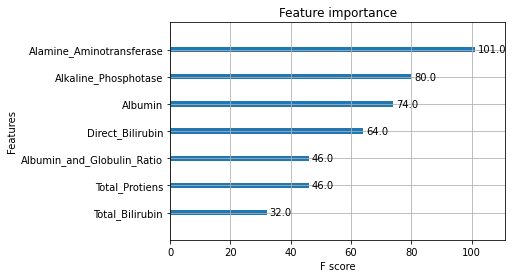

In [105]:
from xgboost import plot_importance
plot_importance(xgb1)
plt.show()

## 7.GBDT

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
GBDT.fit(X_train, y_train) 

y_predGBDT = GBDT.predict(X_test) 
evaluating_model("GradientBoostingClassifier",y_test, y_predGBDT)
GBDT_TRAIN_SCORE = round(GBDT.score(X_train, y_train) * 100, 2)
GBDT_TEST_SCORE = round(GBDT.score(X_test, y_test) * 100, 2)
print(GBDT_TRAIN_SCORE)
print(GBDT_TEST_SCORE)

GradientBoostingClassifier  Accuracy Score:-  0.7253886010362695
GradientBoostingClassifier  Precision Score:-  0.7528735632183908
GradientBoostingClassifier  Recall Score:-  0.9290780141843972
GradientBoostingClassifier  Confusion Matrix:- 
 [[131  10]
 [ 43   9]]
GradientBoostingClassifier Classification Report: 
               precision    recall  f1-score   support

           1       0.75      0.93      0.83       141
           2       0.47      0.17      0.25        52

    accuracy                           0.73       193
   macro avg       0.61      0.55      0.54       193
weighted avg       0.68      0.73      0.68       193

78.46
72.54


#### COMPAIRING MODELS

In [107]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ "Logistic Regrestion", 'Gaussian Naive Bayes','Random Forest',"Support Vector Machine","DecisionTreeClassifier","XGBOOST","GradientBoostingClassifier"],
    'Score': [ LR_TRAIN_SCORE, GNB_TRAIN_SCORE, RFC_TRAIN_SCORE,SVC_TRAIN_SCORE,DTC_TRAIN_SCORE,XGB1_TRAIN_SCORE,GBDT_TRAIN_SCORE],
    'Test Score': [ LR_TEST_SCORE, GNB_TEST_SCORE, RFC_TEST_SCORE,SVC_TEST_SCORE,DTC_TEST_SCORE,XGB1_TEST_SCORE,GBDT_TEST_SCORE]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
3,Support Vector Machine,70.51,73.06
6,GradientBoostingClassifier,78.46,72.54
0,Logistic Regrestion,72.05,72.02
2,Random Forest,100.00,71.50
5,XGBOOST,82.05,70.47
4,DecisionTreeClassifier,77.44,66.84
1,Gaussian Naive Bayes,53.08,57.51


## Conclusion

### From the Models (Logistic Regression, Gaussian Naive Bayes, Random Forest,GBDT,Decisio Tree,XGboost,SVM)  Random Forest performs the best on this dataset

In [118]:
import joblib 
joblib.dump(RFC, 'LiverRFC.pkl') 
model = joblib.load('LiverRFC.pkl' )
model.predict([[0.5,0.1,206,28,7.1,4.5,1.70],
              [1.0,0.3,216,21,7.3,4.4,1.5],
              [5.3,2.3,145,32,5.1,2.6,1.00]])

array([2, 2, 2], dtype=int64)